In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style(style='darkgrid')
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('../input/fifa19/data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
df.shape

(18207, 89)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
df.drop(columns=['Unnamed: 0','ID','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [8]:
df.shape

(18207, 84)

In [9]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


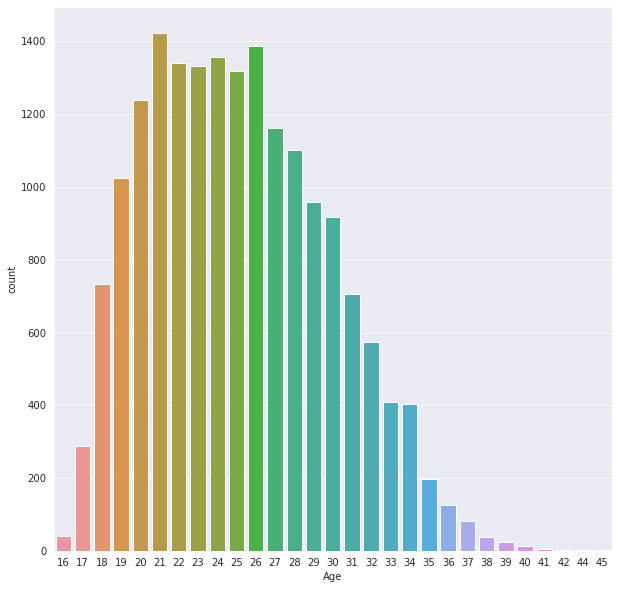

In [10]:
plt.figure(figsize =(10,10))
sns.countplot(df['Age'])

> **Youngest Players ?**

In [11]:
df_young =df[df['Age']<=20]

In [12]:
df_young.shape[0]

3327

In [13]:
df_young.sample()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
15603,R. Polley,19,Netherlands,59,71,ADO Den Haag,€240K,€1K,1486,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,RB,25.0,"Jul 1, 2018",NaN,2021,6'0,157lbs,48+2,48+2,48+2,52+2,49+2,49+2,49+2,52+2,49+2,49+2,49+2,51+2,47+2,47+2,47+2,51+2,57+2,53+2,53+2,53+2,57+2,57+2,59+2,59+2,59+2,57+2,52.0,39.0,54.0,43.0,29.0,63.0,35.0,37.0,31.0,51.0,69.0,62.0,66.0,53.0,63.0,33.0,58.0,58.0,62.0,35.0,60.0,59.0,45.0,46.0,44.0,50.0,62.0,64.0,62.0,9.0,12.0,13.0,11.0,6.0,€408K


Well, that's a lot of them!

In [14]:
print('There are around {}% young players.'.format(np.round((len(df_young)/len(df))*100,2)))

There are around 18.27% young players.


**Let's name some of them.**

In [15]:
youngest = df.sort_values('Age', ascending = True)[['Name', 'Nationality', 'Age','Club','Overall','Position']].head(30)
youngest.set_index('Name', inplace=True)
print(youngest)

                         Nationality  Age                    Club  Overall  \
Name                                                                         
G. Nugent                    England   16         Tranmere Rovers       46   
J. Olstad                     Norway   16         Sarpsborg 08 FF       52   
H. Massengo                   France   16               AS Monaco       62   
J. Italiano                Australia   16             Perth Glory       58   
N. Ayéva                      Sweden   16               Örebro SK       48   
K. Broda                      Poland   16            Wisła Kraków       53   
L. D'Arrigo                Australia   16         Adelaide United       54   
Y. Verschaeren               Belgium   16          RSC Anderlecht       62   
B. Nygren                     Sweden   16            IFK Göteborg       56   
B. O'Gorman      Republic of Ireland   16          Bray Wanderers       50   
A. Doğan                      Turkey   16             Kayserispo

**I would like to focus on Strikers for now. Will think about others, later.**

In [16]:
df_strikers = df[df['Position']=='ST']

In [17]:
df_strikers.shape[0]

2152

Okay, we have 2152 strikers with us.

In [18]:
df_strikers.sample(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3678,H. Martín,25,Mexico,72,75,Club América,€4M,€41K,1830,Right,1.0,3.0,3.0,High/ Low,Normal,No,ST,21.0,"Jan 1, 2018",NaN,2023,5'10,161lbs,70+2,70+2,70+2,71+2,71+2,71+2,71+2,71+2,70+2,70+2,70+2,70+2,64+2,64+2,64+2,70+2,56+2,52+2,52+2,52+2,56+2,53+2,46+2,46+2,46+2,53+2,64.0,73.0,73.0,67.0,66.0,72.0,64.0,51.0,62.0,71.0,78.0,77.0,90.0,71.0,77.0,72.0,80.0,78.0,47.0,64.0,51.0,42.0,72.0,66.0,63.0,70.0,45.0,21.0,22.0,9.0,10.0,11.0,9.0,12.0,€7M
9582,C. Itten,21,Switzerland,66,79,FC St. Gallen,€1.3M,€4K,1607,Right,1.0,3.0,2.0,High/ Medium,Normal,No,ST,13.0,"Jun 25, 2018",NaN,2021,6'2,179lbs,64+2,64+2,64+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,63+2,58+2,58+2,58+2,63+2,52+2,49+2,49+2,49+2,52+2,50+2,45+2,45+2,45+2,50+2,64.0,66.0,68.0,61.0,51.0,60.0,38.0,34.0,55.0,67.0,73.0,61.0,58.0,63.0,63.0,64.0,67.0,70.0,67.0,57.0,46.0,29.0,66.0,55.0,66.0,59.0,28.0,35.0,34.0,9.0,9.0,9.0,7.0,7.0,€2.6M
6968,D. Hylton,29,England,68,68,Luton Town,€900K,€5K,1824,Right,1.0,3.0,3.0,High/ Medium,Normal,No,ST,9.0,"Jul 1, 2016",NaN,2020,6'0,157lbs,67+2,67+2,67+2,64+2,65+2,65+2,65+2,64+2,64+2,64+2,64+2,65+2,63+2,63+2,63+2,65+2,59+2,59+2,59+2,59+2,59+2,58+2,58+2,58+2,58+2,58+2,55.0,69.0,67.0,62.0,61.0,64.0,60.0,45.0,58.0,66.0,67.0,67.0,70.0,67.0,68.0,65.0,76.0,83.0,82.0,62.0,72.0,54.0,70.0,63.0,62.0,69.0,41.0,47.0,49.0,14.0,12.0,7.0,6.0,13.0,€1.6M
6442,J. Verhoek,29,Netherlands,69,69,MSV Duisburg,€1.1M,€5K,1653,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,15.0,"Jul 1, 2018",NaN,2021,6'2,192lbs,67+2,67+2,67+2,60+2,63+2,63+2,63+2,60+2,59+2,59+2,59+2,59+2,53+2,53+2,53+2,59+2,43+2,43+2,43+2,43+2,43+2,42+2,43+2,43+2,43+2,42+2,53.0,71.0,73.0,44.0,65.0,56.0,57.0,62.0,42.0,65.0,55.0,62.0,55.0,69.0,55.0,74.0,83.0,66.0,83.0,59.0,76.0,26.0,73.0,59.0,65.0,68.0,14.0,21.0,17.0,13.0,7.0,13.0,6.0,14.0,€1.7M
12801,C. Ngonge,18,Belgium,63,84,Club Brugge KV,€850K,€2K,1559,Left,1.0,4.0,3.0,Medium/ Medium,Lean,No,ST,27.0,"Jul 1, 2017",NaN,2019,5'10,143lbs,62+2,62+2,62+2,61+2,61+2,61+2,61+2,61+2,59+2,59+2,59+2,59+2,53+2,53+2,53+2,59+2,49+2,44+2,44+2,44+2,49+2,47+2,42+2,42+2,42+2,47+2,42.0,62.0,55.0,53.0,37.0,67.0,53.0,30.0,38.0,66.0,76.0,78.0,75.0,60.0,74.0,65.0,63.0,62.0,60.0,64.0,50.0,40.0,58.0,43.0,60.0,60.0,11.0,35.0,35.0,15.0,7.0,10.0,7.0,8.0,€2.1M


In [19]:
df_strikers.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GK

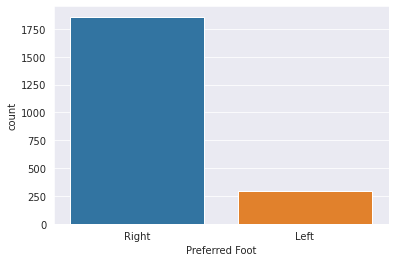

In [20]:
sns.countplot(df_strikers['Preferred Foot'])

In [21]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GK

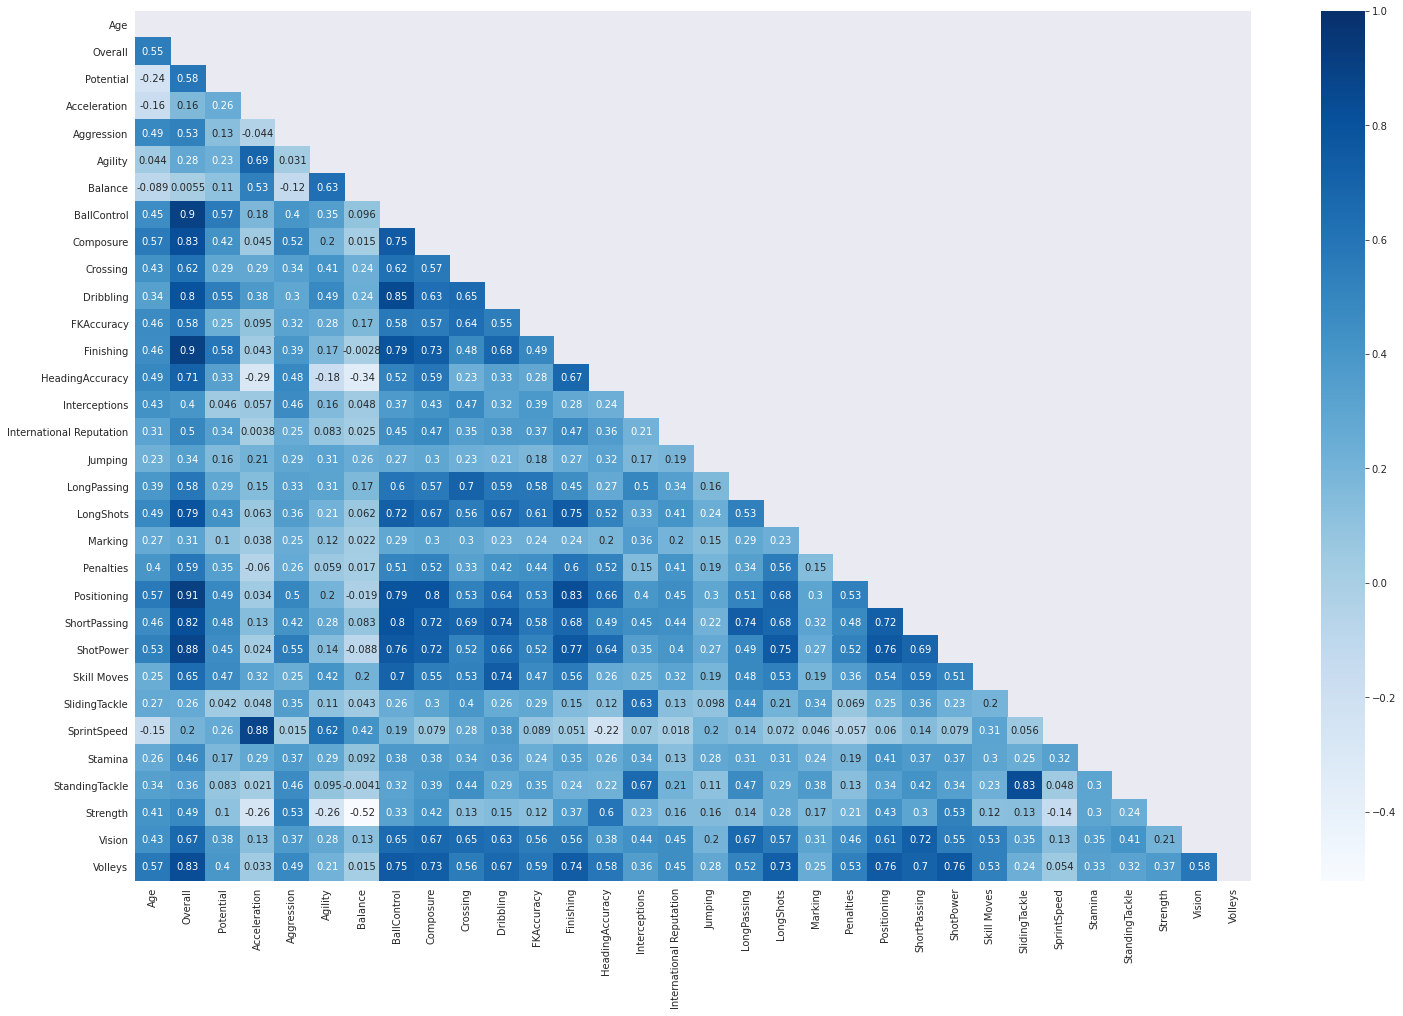

In [22]:
plt.figure(figsize =(25,16))
matrix = np.triu(df_strikers[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr())
sns.heatmap(df_strikers[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']].corr(), annot=True, mask=matrix,cmap='Blues')

> I am observing a positive relation between (ShotPower, ShortPassing, Positioning, **Finishing**, Dribbling, Ball Control) and Overall Performance.

Makes sense, doesn't it? 
For a striker atleast. 

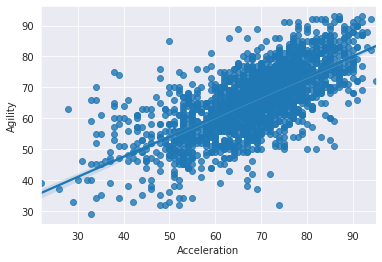

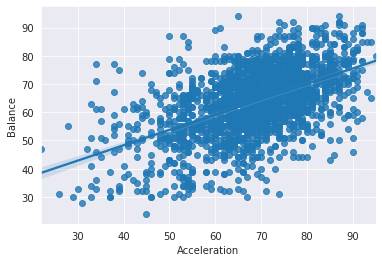

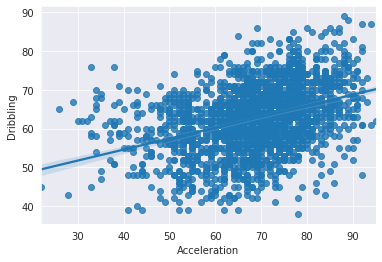

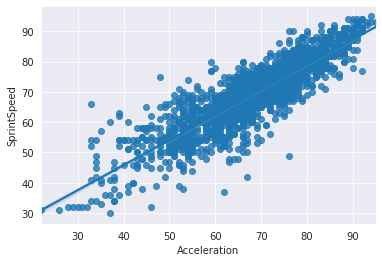

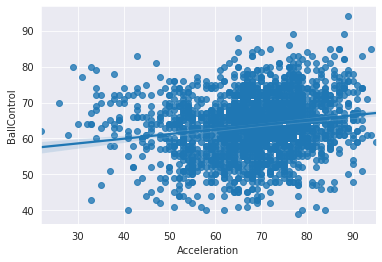

In [23]:
features_y = ['Agility', 'Balance', 'Dribbling', 'SprintSpeed','BallControl']
for ft in features_y:
    sns.regplot(x='Acceleration',y=ft,data=df_strikers)
    plt.show()

In [24]:
my_clubs = [ 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Juventus', 'Manchester United']
df_club = df.loc[df['Club'].isin(my_clubs) & df['Age']]
df_club.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,2346,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9.0,"Jul 11, 2014",NaN,2021,6'0,190lbs,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,85+5,84+5,79+5,79+5,79+5,84+5,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
20,Sergio Busquets,29,Spain,89,89,FC Barcelona,€51.5M,€315K,2065,Right,4.0,3.0,3.0,Medium/ Medium,Lean,Yes,CDM,5.0,"Sep 1, 2008",NaN,2023,6'2,168lbs,71+3,71+3,71+3,74+3,76+3,76+3,76+3,74+3,79+3,79+3,79+3,76+3,83+3,83+3,83+3,76+3,79+3,86+3,86+3,86+3,79+3,78+3,82+3,82+3,82+3,78+3,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M


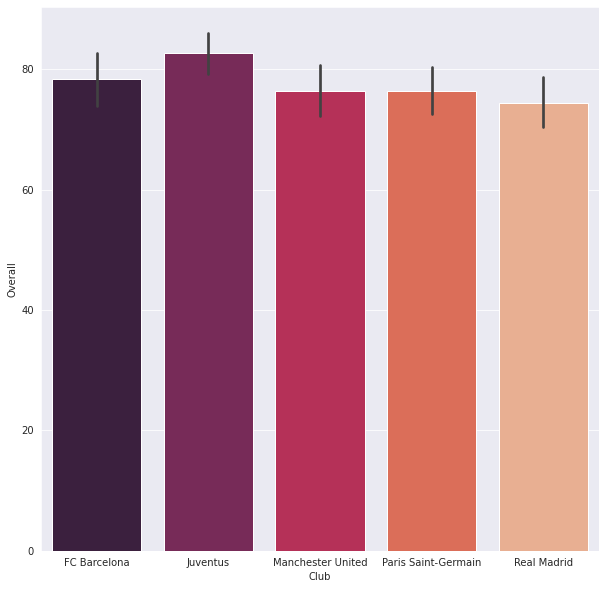

In [25]:
plt.figure(figsize =(10,10))
sns.barplot(x=df_club['Club'], y=df_club['Overall'], palette="rocket")

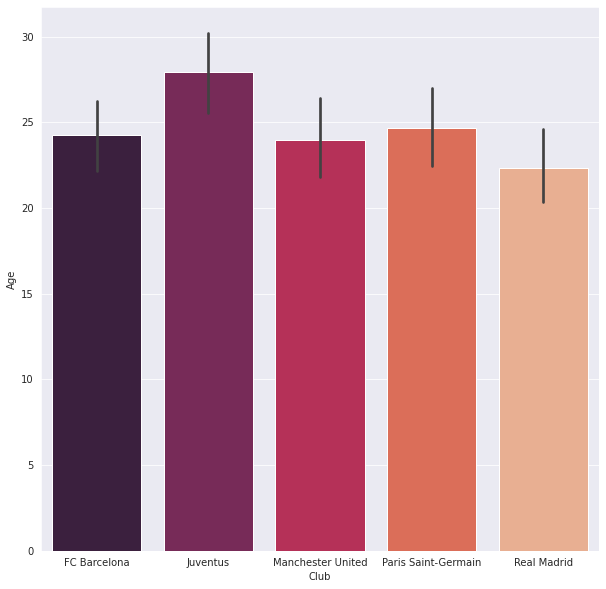

In [26]:
plt.figure(figsize =(10,10))
sns.barplot(x=df_club['Club'], y=df_club['Age'], palette="rocket")

In [27]:
my_team = df[df['Club']=='Real Madrid']
my_team.shape

(33, 84)

In [28]:
my_team.sample(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
27,Casemiro,26,Brazil,88,90,Real Madrid,€59.5M,€285K,2170,Right,3.0,3.0,2.0,Medium/ High,Normal,Yes,CDM,14.0,"Jul 11, 2013",NaN,2021,6'1,185lbs,72+3,72+3,72+3,69+3,73+3,73+3,73+3,69+3,74+3,74+3,74+3,71+3,80+3,80+3,80+3,71+3,78+3,85+3,85+3,85+3,78+3,79+3,85+3,85+3,85+3,79+3,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M
30,Isco,26,Spain,88,91,Real Madrid,€73.5M,€315K,2137,Right,3.0,3.0,4.0,High/ Medium,Normal,Yes,LW,22.0,"Jul 3, 2013",NaN,2022,5'9,174lbs,76+3,76+3,76+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,83+3,83+3,83+3,83+3,83+3,72+3,73+3,73+3,73+3,72+3,68+3,63+3,63+3,63+3,68+3,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,75.0,69.0,87.0,77.0,90.0,69.0,64.0,70.0,59.0,87.0,58.0,64.0,78.0,89.0,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M
12504,Dani Gómez,19,Spain,63,77,Real Madrid,€800K,€12K,1448,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,38.0,"Jul 1, 2017",NaN,2022,5'10,154lbs,61+2,61+2,61+2,57+2,59+2,59+2,59+2,57+2,57+2,57+2,57+2,55+2,48+2,48+2,48+2,55+2,39+2,38+2,38+2,38+2,39+2,38+2,36+2,36+2,36+2,38+2,32.0,67.0,58.0,54.0,54.0,60.0,41.0,45.0,35.0,66.0,66.0,65.0,70.0,56.0,65.0,59.0,62.0,51.0,70.0,52.0,28.0,12.0,61.0,42.0,57.0,44.0,41.0,12.0,15.0,7.0,10.0,13.0,8.0,14.0,€2.1M
8732,Javi Sánchez,21,Spain,67,79,Real Madrid,€1.2M,€24K,1444,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CB,31.0,"Jul 1, 2016",NaN,2019,6'2,170lbs,45+2,45+2,45+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,46+2,50+2,50+2,50+2,46+2,59+2,61+2,61+2,61+2,59+2,61+2,66+2,66+2,66+2,61+2,32.0,28.0,66.0,63.0,18.0,34.0,27.0,34.0,38.0,61.0,55.0,64.0,41.0,63.0,51.0,38.0,72.0,68.0,68.0,32.0,70.0,67.0,25.0,35.0,38.0,55.0,64.0,67.0,65.0,11.0,15.0,13.0,8.0,13.0,€2.7M
328,Dani Ceballos,21,Spain,81,88,Real Madrid,€25M,€120K,2059,Right,1.0,3.0,4.0,Medium/ Medium,Normal,Yes,LCM,21.0,"Jul 14, 2017",NaN,2023,5'10,154lbs,70+2,70+2,70+2,78+2,77+2,77+2,77+2,78+2,80+2,80+2,80+2,78+2,80+2,80+2,80+2,78+2,75+2,76+2,76+2,76+2,75+2,73+2,68+2,68+2,68+2,73+2,74.0,68.0,41.0,83.0,62.0,85.0,73.0,63.0,80.0,85.0,73.0,67.0,82.0,80.0,79.0,64.0,52.0,75.0,62.0,71.0,76.0,76.0,76.0,83.0,55.0,80.0,62.0,75.0,74.0,12.0,15.0,16.0,7.0,13.0,€56.3M


In [29]:
my_team.sort_values(by='Age').head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1143,Vinícius Júnior,17,Brazil,77,92,Real Madrid,€17.5M,€66K,1849,Right,1.0,4.0,5.0,High/ Medium,Lean,No,LW,28.0,"Jul 12, 2018",NaN,2025,5'9,161lbs,72+2,72+2,72+2,76+2,75+2,75+2,75+2,76+2,74+2,74+2,74+2,75+2,65+2,65+2,65+2,75+2,56+2,50+2,50+2,50+2,56+2,52+2,42+2,42+2,42+2,52+2,65.0,70.0,50.0,70.0,71.0,81.0,77.0,62.0,48.0,80.0,92.0,94.0,90.0,70.0,82.0,74.0,74.0,79.0,59.0,68.0,48.0,26.0,74.0,69.0,65.0,75.0,32.0,25.0,18.0,5.0,7.0,7.0,7.0,10.0,€46.8M
11327,Fran García,18,Spain,64,79,Real Madrid,€825K,€9K,1644,Left,1.0,3.0,2.0,High/ Medium,Normal,No,LB,37.0,"Jul 1, 2018",NaN,2019,5'7,139lbs,53+2,53+2,53+2,60+2,57+2,57+2,57+2,60+2,57+2,57+2,57+2,61+2,57+2,57+2,57+2,61+2,63+2,58+2,58+2,58+2,63+2,62+2,57+2,57+2,57+2,62+2,65.0,42.0,44.0,57.0,39.0,62.0,55.0,36.0,49.0,65.0,79.0,79.0,68.0,62.0,89.0,47.0,60.0,66.0,44.0,45.0,63.0,62.0,49.0,54.0,39.0,60.0,60.0,58.0,59.0,9.0,6.0,12.0,9.0,11.0,€2.2M
11877,Manu Hernando,19,Spain,64,76,Real Madrid,€700K,€9K,1568,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,CB,33.0,"Jul 1, 2017",NaN,2021,5'11,170lbs,51+2,51+2,51+2,52+2,52+2,52+2,52+2,52+2,52+2,52+2,52+2,54+2,54+2,54+2,54+2,54+2,60+2,60+2,60+2,60+2,60+2,61+2,63+2,63+2,63+2,61+2,44.0,32.0,68.0,62.0,29.0,56.0,44.0,39.0,53.0,64.0,61.0,63.0,61.0,59.0,64.0,47.0,59.0,66.0,62.0,45.0,58.0,55.0,43.0,37.0,42.0,47.0,70.0,65.0,67.0,11.0,12.0,13.0,12.0,5.0,€1.6M
11163,Sergio López,19,Spain,64,80,Real Madrid,€875K,€9K,1715,Right,1.0,3.0,3.0,High/ Medium,Lean,No,RB,32.0,"Jul 1, 2018",NaN,2019,5'10,146lbs,58+2,58+2,58+2,61+2,59+2,59+2,59+2,61+2,59+2,59+2,59+2,61+2,58+2,58+2,58+2,61+2,63+2,59+2,59+2,59+2,63+2,63+2,59+2,59+2,59+2,63+2,63.0,52.0,56.0,61.0,48.0,64.0,57.0,41.0,56.0,63.0,78.0,79.0,69.0,63.0,72.0,63.0,61.0,61.0,51.0,59.0,62.0,60.0,50.0,46.0,43.0,62.0,59.0,61.0,62.0,12.0,12.0,11.0,7.0,13.0,€2.3M
2513,F. Valverde,19,Uruguay,74,84,Real Madrid,€8.5M,€46K,1789,Right,1.0,3.0,3.0,Medium/ Medium,Normal,Yes,CM,5.0,"Jul 22, 2016",NaN,2021,6'0,172lbs,66+2,66+2,66+2,68+2,70+2,70+2,70+2,68+2,71+2,71+2,71+2,68+2,73+2,73+2,73+2,68+2,65+2,69+2,69+2,69+2,65+2,64+2,62+2,62+2,62+2,64+2,49.0,67.0,48.0,78.0,38.0,70.0,51.0,48.0,81.0,74.0,69.0,68.0,51.0,69.0,64.0,77.0,49.0,68.0,56.0,77.0,59.0,68.0,61.0,75.0,42.0,70.0,70.0,67.0,50.0,6.0,10.0,6.0,15.0,8.0,€19.1M


In [30]:
my_team.nlargest(5,'Potential')

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
79,Marco Asensio,22,Spain,85,92,Real Madrid,€54M,€215K,2050,Left,3.0,3.0,4.0,High/ Medium,Normal,Yes,RW,10.0,"Jul 1, 2015",NaN,2023,6'0,168lbs,79+3,79+3,79+3,83+3,83+3,83+3,83+3,83+3,83+3,83+3,83+3,83+3,79+3,79+3,79+3,83+3,66+3,63+3,63+3,63+3,66+3,62+3,51+3,51+3,51+3,62+3,82.0,82.0,50.0,83.0,79.0,86.0,83.0,76.0,82.0,85.0,85.0,82.0,79.0,82.0,76.0,86.0,58.0,76.0,61.0,88.0,45.0,45.0,82.0,84.0,62.0,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,€121.5M
1143,Vinícius Júnior,17,Brazil,77,92,Real Madrid,€17.5M,€66K,1849,Right,1.0,4.0,5.0,High/ Medium,Lean,No,LW,28.0,"Jul 12, 2018",NaN,2025,5'9,161lbs,72+2,72+2,72+2,76+2,75+2,75+2,75+2,76+2,74+2,74+2,74+2,75+2,65+2,65+2,65+2,75+2,56+2,50+2,50+2,50+2,56+2,52+2,42+2,42+2,42+2,52+2,65.0,70.0,50.0,70.0,71.0,81.0,77.0,62.0,48.0,80.0,92.0,94.0,90.0,70.0,82.0,74.0,74.0,79.0,59.0,68.0,48.0,26.0,74.0,69.0,65.0,75.0,32.0,25.0,18.0,5.0,7.0,7.0,7.0,10.0,€46.8M
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,"Aug 1, 2005",NaN,2020,6'0,181lbs,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
30,Isco,26,Spain,88,91,Real Madrid,€73.5M,€315K,2137,Right,3.0,3.0,4.0,High/ Medium,Normal,Yes,LW,22.0,"Jul 3, 2013",NaN,2022,5'9,174lbs,76+3,76+3,76+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,83+3,83+3,83+3,83+3,83+3,72+3,73+3,73+3,73+3,72+3,68+3,63+3,63+3,63+3,68+3,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,75.0,69.0,87.0,77.0,90.0,69.0,64.0,70.0,59.0,87.0,58.0,64.0,78.0,89.0,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,€156.2M


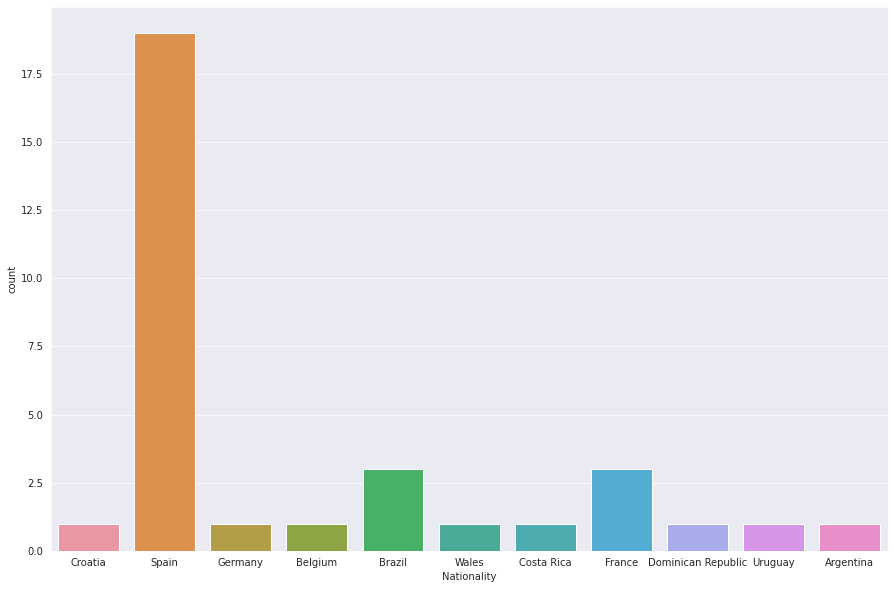

In [31]:
plt.figure(figsize =(15,10))
sns.countplot(my_team['Nationality'])

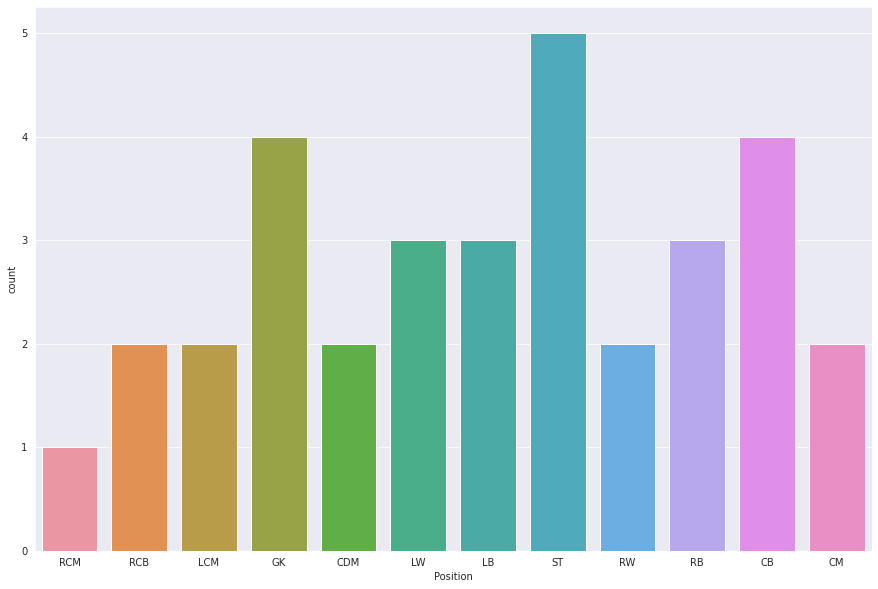

In [32]:
plt.figure(figsize =(15,10))
sns.countplot(my_team['Position'])

Well Well, don't we need an RCM? Or has Ramos got everything under control?